# 🛒 Análise de Dados de Vendas - Processo Seletivo GreenTech

**Candidato:** David Cardoso  
**Data:** Julho/2025  
**Desafio:** Análise de dados reais de vendas de um supermercado online nos Estados Unidos, com foco em geração de insights estratégicos.

📍 Este projeto foi desenvolvido como parte do processo seletivo da GreenTech, entidade estudantil da UFABC, e tem como objetivo utilizar **análise exploratória de dados** para resolver problemas reais de negócio.

## Objetivos

A partir do conjunto de dados fornecido, o objetivo principal é extrair insights que possam auxiliar na tomada de decisão da empresa. Para isso, serão analisadas:

- O **perfil dos clientes**: quais segmentos mais compram e o que consomem?
- O **desempenho das vendas**: quais categorias ou regiões são mais lucrativas?
- A **eficiência das entregas e pagamentos**: há impacto no lucro ou devoluções?

A análise será guiada por **dados reais** e utilizará ferramentas como Python, Pandas, Matplotlib e Seaborn para manipulação e visualização.

## Etapa 1: Configuração do Ambiente

Importação das bibliotecas necessárias para análise de dados e criação de visualizações gráficas.

In [1]:
# Bibliotecas de análise e visualização
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Etapa 2: Carregamento e Visualização Inicial

Nesta etapa, o dataset será carregado e avaliado para entender sua estrutura:  
- Quais são as colunas e seus tipos?  
- Existem valores ausentes?  
- Algum dado precisa ser limpo ou transformado?

In [2]:
# Carregando o dataset
df = pd.read_csv("vendas_supermercado.csv")

# Verificando as primeiras linhas
df.head()

,Unnamed: 0,CODIGO_PEDIDO,DATA_PEDIDO,DATA_ENTREGA,FORMA_ENTREGA,CODIGO_CLIENTE,NOME_CLIENTE,SEGMENTO_CLIENTE,PAIS,CIDADE,...,REGIAO,CODIGO_PRODUTO,CATEGORIA_PRODUTO,SUB_CATEGORIA_PRODUTO,NOME_PRODUTO,VALOR_PRODUTO,QUANTIDADE,LUCRO,DEVOLUCAO,MODO_PAGAMENTO
0,0,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1.0,28.2668,No,Online
1,1,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3.0,38.2668,No,Online
2,2,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2.0,67.2742,No,Cards
3,3,CA-2019-125206,2019-01-03,2019-01-05,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2.0,28.6150,No,Online
4,4,US-2019-116365,2019-01-03,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2.0,-5.2640,No,Online


## Etapa 3: Análise da Estrutura e Dados Faltantes

Aqui verificamos:
- O número de linhas e colunas do dataset.
- O tipo de dado de cada coluna.
- Quantidade de valores ausentes (nulos) em cada coluna.

In [3]:
# Informações gerais do dataset
df.info()

# Verificando valores nulos
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5901 non-null   int64  
 1   CODIGO_PEDIDO          5901 non-null   object 
 2   DATA_PEDIDO            5901 non-null   object 
 3   DATA_ENTREGA           5801 non-null   object 
 4   FORMA_ENTREGA          5801 non-null   object 
 5   CODIGO_CLIENTE         5801 non-null   object 
 6   NOME_CLIENTE           5801 non-null   object 
 7   SEGMENTO_CLIENTE       5801 non-null   object 
 8   PAIS                   5801 non-null   object 
 9   CIDADE                 5801 non-null   object 
 10  ESTADO                 5801 non-null   object 
 11  REGIAO                 5801 non-null   object 
 12  CODIGO_PRODUTO         5801 non-null   object 
 13  CATEGORIA_PRODUTO      5801 non-null   object 
 14  SUB_CATEGORIA_PRODUTO  5801 non-null   object 
 15  NOME

Unnamed: 0                 0
CODIGO_PEDIDO              0
DATA_PEDIDO                0
DATA_ENTREGA             100
FORMA_ENTREGA            100
CODIGO_CLIENTE           100
NOME_CLIENTE             100
SEGMENTO_CLIENTE         100
PAIS                     100
CIDADE                   100
ESTADO                   100
REGIAO                   100
CODIGO_PRODUTO           100
CATEGORIA_PRODUTO        100
SUB_CATEGORIA_PRODUTO    100
NOME_PRODUTO             100
VALOR_PRODUTO            100
QUANTIDADE               100
LUCRO                    100
DEVOLUCAO                100
MODO_PAGAMENTO           100
dtype: int64

## Etapa 4: Limpeza e Pré-Processamento

Antes de realizar qualquer análise, precisamos garantir que os dados estejam consistentes. Nesta etapa, serão realizados os seguintes ajustes:

- Remoção da coluna desnecessária `Unnamed: 0`
- Remoção de linhas com valores ausentes (100 linhas com múltiplos campos nulos)
- Conversão de colunas de data para o tipo datetime

In [ ]:
# Remover coluna desnecessária
df = df.drop(columns=["Unnamed: 0"])

# Remover linhas com muitos valores ausentes
df = df.dropna(thresh=5)  # mantém apenas linhas com pelo menos 5 colunas preenchidas

# Verificar novamente valores nulos após a limpeza
df.isnull().sum()

In [6]:
# Converter colunas de data para o tipo datetime
df["DATA_PEDIDO"] = pd.to_datetime(df["DATA_PEDIDO"], errors="coerce")
df["DATA_ENTREGA"] = pd.to_datetime(df["DATA_ENTREGA"], errors="coerce")

# Etapa 5: Análise Exploratória – Visão Geral dos Clientes


Nesta etapa, vamos responder à primeira pergunta do desafio:

> Quais são os segmentos de clientes mais frequentes (Corporate, Consumer) 
e quais produtos eles compram mais?

In [7]:
# Distribuição dos Segmentos de Clientes
segmentos = df["SEGMENTO_CLIENTE"].value_counts()
segmentos

SEGMENTO_CLIENTE
Consumer       2948
Corporate      1745
Home Office    1108
Name: count, dtype: int64

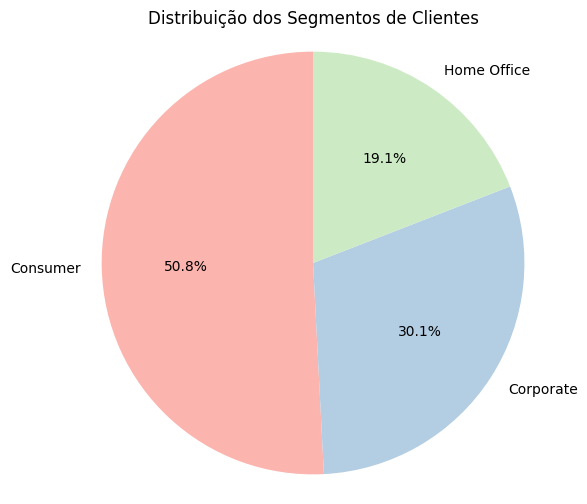

In [8]:
# Gráfico de Pizza dos Segmentos
plt.figure(figsize=(6,6))
plt.pie(segmentos, labels=segmentos.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title("Distribuição dos Segmentos de Clientes")
plt.axis('equal')
plt.show()

In [9]:
# Produtos mais comprados por segmento
produtos_segmento = df.groupby(["SEGMENTO_CLIENTE", "NOME_PRODUTO"])["QUANTIDADE"].sum().reset_index()

# Selecionar os 5 produtos mais comprados por segmento
top_produtos = produtos_segmento.sort_values(by="QUANTIDADE", ascending=False).groupby("SEGMENTO_CLIENTE").head(5)
top_produtos

,SEGMENTO_CLIENTE,NOME_PRODUTO,QUANTIDADE
1177,Consumer,Staples,55.0
2348,Corporate,Staples,54.0
1178,Consumer,Staples in misc. colors,52.0
1173,Consumer,Staple envelope,45.0
209,Consumer,Avery Non-Stick Binders,38.0
1175,Consumer,Staple remover,35.0
2772,Home Office,Easy-staple paper,33.0
1492,Corporate,"Acco Pressboard Covers with Storage Hooks, 14 ...",31.0
1761,Corporate,Easy-staple paper,30.0
2342,Corporate,Staple envelope,26.0


# Conclusão da Etapa 5

Ao analisar os dados, observamos quais segmentos de clientes mais compram
e quais são os produtos com maior volume de vendas.

Essas informações ajudam a empresa a entender o perfil de consumo e tomar 
decisões mais estratégicas para estoque, marketing e atendimento.

## Etapa 6: Produtos e Categorias Mais Lucrativos

Nesta etapa, analisamos quais categorias e subcategorias de produtos geram maior lucro para o supermercado. Essas informações são essenciais para estratégias de estoque, promoção e rentabilidade.

In [10]:
lucro_por_categoria = df.groupby("CATEGORIA_PRODUTO")["LUCRO"].sum().sort_values(ascending=False)
print(lucro_por_categoria)

CATEGORIA_PRODUTO
Technology         85499.4104
Office Supplies    70317.6912
Furniture           9873.2185
Name: LUCRO, dtype: float64


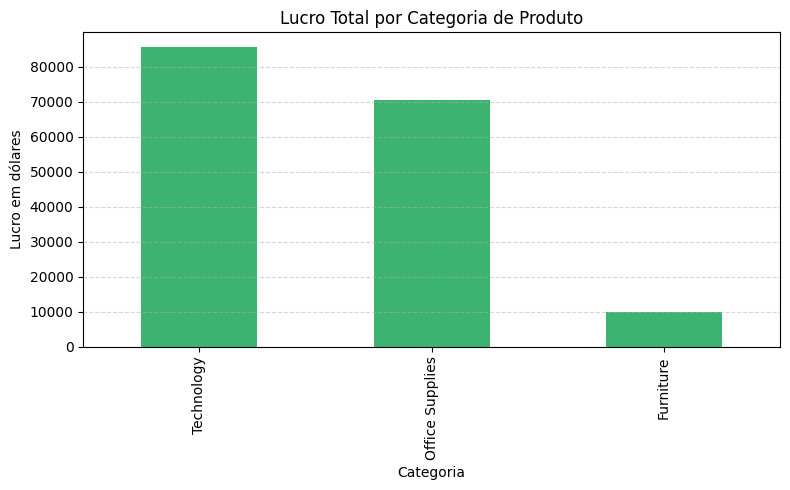

In [11]:
plt.figure(figsize=(8,5))
lucro_por_categoria.plot(kind="bar", color="mediumseagreen")
plt.title("Lucro Total por Categoria de Produto")
plt.ylabel("Lucro em dólares")
plt.xlabel("Categoria")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

A categoria com maior lucro foi **Technology**, sendo a principal fonte de receita. As categorias com menor lucro devem ser analisadas para avaliar seu desempenho.

In [12]:
lucro_por_subcategoria = df.groupby("SUB_CATEGORIA_PRODUTO")["LUCRO"].sum().sort_values(ascending=False)
print(lucro_por_subcategoria.head(10))

SUB_CATEGORIA_PRODUTO
Copiers        42102.5940
Accessories    24718.3570
Phones         21539.8630
Paper          20281.4197
Binders        16960.0465
Chairs         13215.8428
Appliances     12381.5756
Storage        12172.1780
Furnishings     7553.7704
Art             3545.8364
Name: LUCRO, dtype: float64


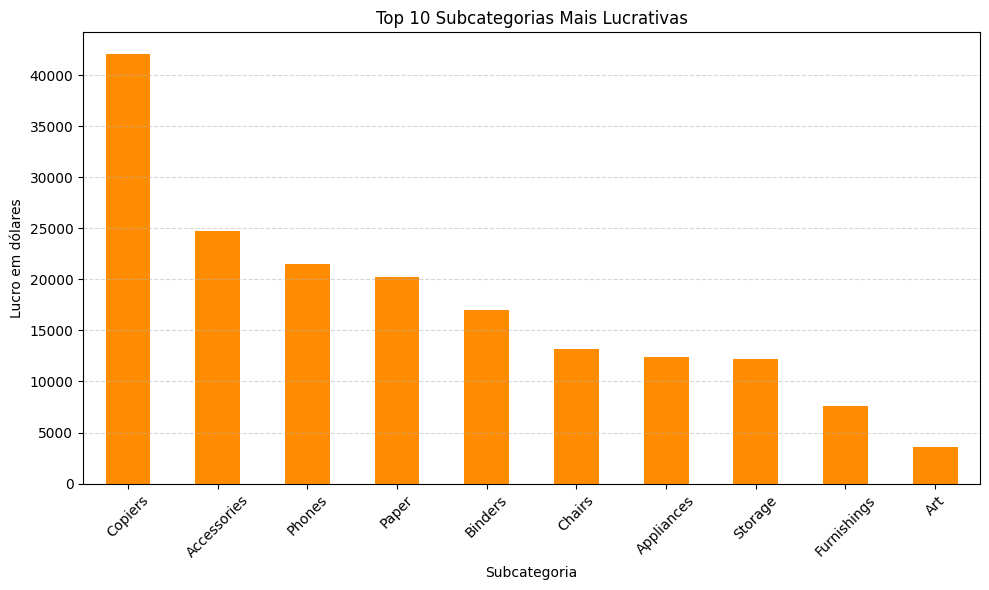

In [13]:
plt.figure(figsize=(10,6))
lucro_por_subcategoria.head(10).plot(kind="bar", color="darkorange")
plt.title("Top 10 Subcategorias Mais Lucrativas")
plt.ylabel("Lucro em dólares")
plt.xlabel("Subcategoria")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A subcategoria mais lucrativa foi **Copiers**. Essa análise permite uma melhor priorização na gestão de produtos e categorias mais estratégicas para o negócio.

## Etapa 7: Lucro por Região e Forma de Pagamento

Agora vamos entender se o lucro da empresa varia de acordo com a **região geográfica** e **forma de pagamento**. Essas análises ajudam a compreender o comportamento dos clientes em diferentes locais e preferências de pagamento.

In [14]:
lucro_regiao = df.groupby("REGIAO")["LUCRO"].sum().sort_values(ascending=False)
print(lucro_regiao)

REGIAO
West       66283.6367
East       51882.4373
Central    25038.4467
South      22485.7994
Name: LUCRO, dtype: float64


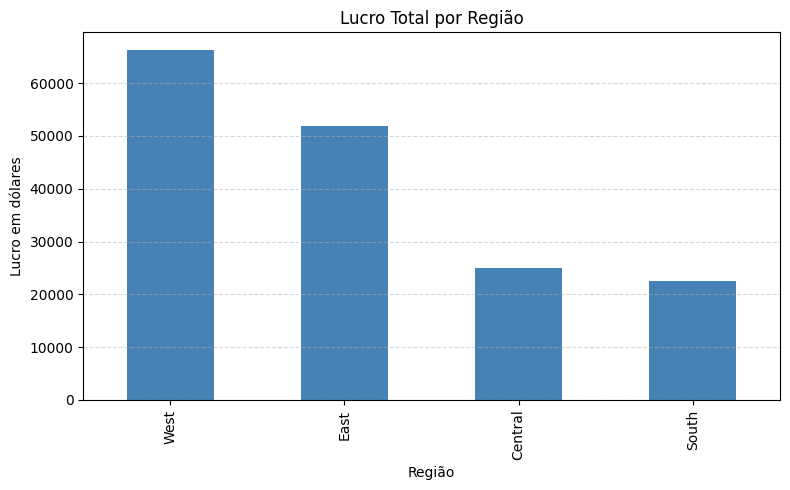

In [15]:
plt.figure(figsize=(8,5))
lucro_regiao.plot(kind="bar", color="steelblue")
plt.title("Lucro Total por Região")
plt.ylabel("Lucro em dólares")
plt.xlabel("Região")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

A região com maior lucro foi **West**. Diferenças entre regiões podem refletir aspectos econômicos, logísticos ou até preferências locais por categorias de produtos.

In [16]:
lucro_pagamento = df.groupby("MODO_PAGAMENTO")["LUCRO"].sum().sort_values(ascending=False)
print(lucro_pagamento)

MODO_PAGAMENTO
COD       76375.2222
Online    51718.8458
Cards     37596.2521
Name: LUCRO, dtype: float64


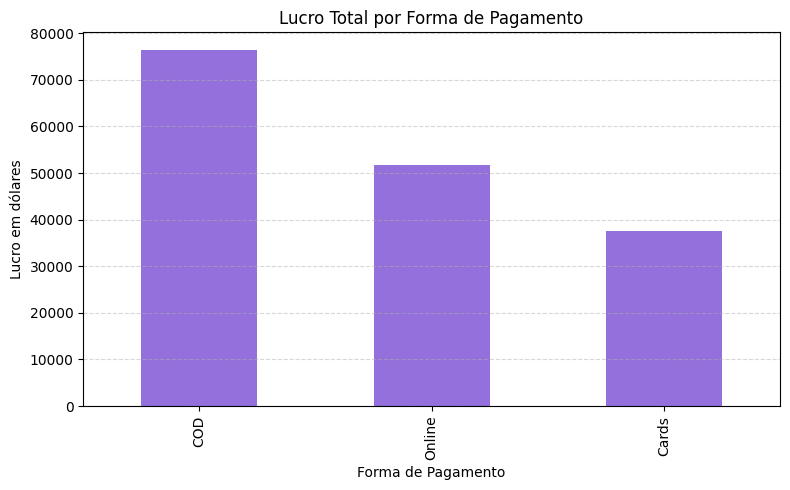

In [17]:
plt.figure(figsize=(8,5))
lucro_pagamento.plot(kind="bar", color="mediumpurple")
plt.title("Lucro Total por Forma de Pagamento")
plt.ylabel("Lucro em dólares")
plt.xlabel("Forma de Pagamento")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

A forma de pagamento com maior lucro foi **COD**. Compreender esse padrão ajuda a direcionar promoções ou facilitar opções de pagamento preferidas pelos clientes.

## Etapa 7: Lucro por Região e Forma de Pagamento

Nesta etapa, analisamos se o lucro varia de acordo com a região geográfica e com a forma de pagamento utilizada. Essas informações podem ajudar a empresa a identificar oportunidades regionais e preferências dos consumidores em relação aos meios de pagamento.